In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Sample 2 - Event Timeline.csv')
print(df)

        No.       Time         Source    Destination Protocol  Length  \
0       369   5.626264  192.168.0.217    192.207.0.1      UDP      78   
1       370   5.626265  192.168.0.217    192.207.0.1      UDP      78   
2       371   5.626266  192.168.0.217    192.207.0.1      UDP      78   
3       372   5.626266  192.168.0.217    192.207.0.1      UDP      78   
4       373   5.626269  192.168.0.217    192.207.0.1      UDP      78   
...     ...        ...            ...            ...      ...     ...   
7852  10415  89.156904  192.168.0.217    192.207.0.1      IDN     127   
7853  10416  89.157799    192.207.0.1  192.168.0.217      IDN      81   
7854  10417  89.162897  192.168.0.217    192.207.0.1      IDN     127   
7855  10418  89.170829  192.168.0.217    192.207.0.1      IDN     127   
7856  10419  89.179160  192.168.0.217    192.207.0.1      IDN     127   

                       Info  
0     52807  >  8181 Len=36  
1     52806  >  8181 Len=36  
2     52809  >  8181 Len=36  
3  

# Notes: Riot IP is now 192.207.0.1
# Notes: UDP Protocol - Port 8181
# Events: Agent movement, Camera Angle, Syncronization

In [2]:
riot_games_ip = "192.207.0.1"
print(riot_games_ip)
filter_df = df[(df['Destination'] == riot_games_ip) | (df['Source'] == riot_games_ip)]
print(filter_df)
#Data set for Riot Games connection only

192.207.0.1
        No.       Time         Source    Destination Protocol  Length  \
0       369   5.626264  192.168.0.217    192.207.0.1      UDP      78   
1       370   5.626265  192.168.0.217    192.207.0.1      UDP      78   
2       371   5.626266  192.168.0.217    192.207.0.1      UDP      78   
3       372   5.626266  192.168.0.217    192.207.0.1      UDP      78   
4       373   5.626269  192.168.0.217    192.207.0.1      UDP      78   
...     ...        ...            ...            ...      ...     ...   
7852  10415  89.156904  192.168.0.217    192.207.0.1      IDN     127   
7853  10416  89.157799    192.207.0.1  192.168.0.217      IDN      81   
7854  10417  89.162897  192.168.0.217    192.207.0.1      IDN     127   
7855  10418  89.170829  192.168.0.217    192.207.0.1      IDN     127   
7856  10419  89.179160  192.168.0.217    192.207.0.1      IDN     127   

                       Info  
0     52807  >  8181 Len=36  
1     52806  >  8181 Len=36  
2     52809  >  8181 

In [3]:
data_size = filter_df.groupby('Time')['Length'].value_counts()
print(data_size)
#Isolates times by package size

Time       Length
5.626264   78        1
5.626265   78        1
5.626266   78        2
5.626269   78        1
5.626276   78        1
                    ..
89.156904  127       1
89.157799  81        1
89.162897  127       1
89.170829  127       1
89.179160  127       1
Name: count, Length: 7606, dtype: int64


Time       Length
73.874999  81        2
5.851702   78        2
84.130044  88        2
73.648021  81        2
84.334331  81        2
                    ..
54.841293  117       1
54.832638  117       1
54.825873  117       1
54.824137  88        1
89.179160  127       1
Name: count, Length: 7606, dtype: int64


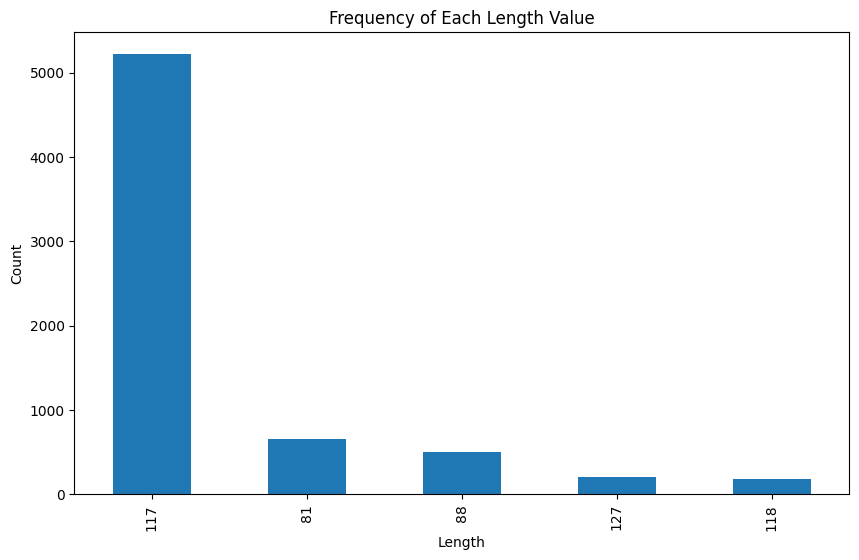

In [4]:
#determining idle packet sizes
data_size = filter_df.groupby('Time')['Length'].value_counts()
length = filter_df['Length'].value_counts()
data_size = data_size.sort_values(ascending=False)
print(data_size)
length_counts = filter_df['Length'].value_counts()
length_counts = length_counts[length_counts >= 100]

# Plot the bar graph
plt.figure(figsize=(10, 6))
length_counts.plot(kind='bar')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Frequency of Each Length Value')
plt.show()

In [5]:
#UDP Payload Data 
payload_data = pd.read_json('Sample 2 - Event Timeline.json')
udp_data = []
time_data = []
for packet in payload_data['_source']:
    udp_payload = packet['layers']['udp']['udp.payload']
    time_payload = packet['layers']['frame']['frame.time_relative']
    udp_data.append(udp_payload)
    time_data.append(time_payload)

payload = pd.DataFrame(udp_data,columns=['payload'])
time_data = pd.DataFrame(time_data)
payload['time'] = time_data
print(payload)

                                                payload          time
0     35:41:8d:b8:b6:32:d8:51:ab:59:7f:81:5b:c0:01:e...   5.626264000
1     94:0d:44:03:bd:32:f3:1e:ab:59:7f:81:5b:c0:01:e...   5.626265000
2     22:e4:56:cb:60:32:fa:8d:ab:59:7f:81:5b:c0:01:e...   5.626266000
3     d6:80:ac:46:5a:32:d8:43:ab:59:7f:81:5b:c0:01:e...   5.626266000
4     b9:cd:dd:b6:af:32:da:27:ab:59:7f:81:5b:c0:01:e...   5.626269000
...                                                 ...           ...
7852  98:3f:ec:57:9c:32:fa:8d:d2:48:d0:9d:73:32:2c:c...  89.156904000
7853  9c:32:fa:8d:e0:58:37:cd:4b:fe:8c:16:0c:d0:46:6...  89.157799000
7854  98:3f:ec:57:9c:32:fa:8d:d4:48:d0:9d:21:77:6a:2...  89.162897000
7855  98:3f:ec:57:9c:32:fa:8d:d6:48:d0:9d:91:16:51:7...  89.170829000
7856  98:3f:ec:57:9c:32:fa:8d:d8:48:d0:9d:91:2e:f1:2...  89.179160000

[7857 rows x 2 columns]


In [6]:
#Data filtering payload of interest
filtered_payload = payload
filtered_payload = payload[payload['payload'].str.startswith('98:3f:ec:57:9c:32:fa:8d:')]
filtered_payload['payload'] = filtered_payload['payload'].str.replace('98:3f:ec:57:9c:32:fa:8d:','')
filtered_payload = filtered_payload[~filtered_payload['payload'].str.contains('01:00:00:00:00:00:00:00:00:00:00:00:00:00:00:0')]
print(filtered_payload)

                                                payload          time
198   01:00:00:00:56:31:01:fc:a1:37:a7:92:5f:d6:03:c...  30.723415000
200   01:00:00:c0:18:96:47:fd:81:53:17:ef:2b:2f:9b:5...  30.762292000
202   f0:18:d0:9d:e7:27:fc:d6:a0:6e:79:9f:e0:da:77:1...  30.770221000
205   f2:18:d0:9d:57:b6:e7:9a:d8:ea:c8:17:4b:f5:34:0...  30.810055000
207   f4:18:d0:9d:45:72:88:30:a9:04:eb:04:a3:41:0a:1...  31.038024000
...                                                 ...           ...
7851  d0:48:d0:9d:bb:2f:12:8a:91:ee:46:99:21:88:fe:3...  89.148022000
7852  d2:48:d0:9d:73:32:2c:c1:ac:79:59:ba:c6:37:80:f...  89.156904000
7854  d4:48:d0:9d:21:77:6a:2f:72:d8:0f:3c:26:81:74:e...  89.162897000
7855  d6:48:d0:9d:91:16:51:70:31:d2:55:ae:7f:2d:b0:8...  89.170829000
7856  d8:48:d0:9d:91:2e:f1:22:af:a8:a3:ab:c8:9e:40:2...  89.179160000

[6135 rows x 2 columns]


C:\Users\Sergeant Wiley\AppData\Local\Temp\ipykernel_32884\2904100932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_payload['payload'] = filtered_payload['payload'].str.replace('98:3f:ec:57:9c:32:fa:8d:','')


# Key featuers of interest.
# First character indicates angle (theory) - Investigating
# Second idnicates position (thoery) - Investigating

In [7]:
#Filter angle. First 3 characters
angle = filtered_payload
angle['payload'] = angle['payload'].str.slice(0,2)
angle['payload'] = angle['payload'].apply(lambda x: int(x, 16))
angle['time'] = payload['time']
print(angle)

      payload          time
198         1  30.723415000
200         1  30.762292000
202       240  30.770221000
205       242  30.810055000
207       244  31.038024000
...       ...           ...
7851      208  89.148022000
7852      210  89.156904000
7854      212  89.162897000
7855      214  89.170829000
7856      216  89.179160000

[6135 rows x 2 columns]


In [8]:
data = angle[angle['payload'] >= 360]
print(data)
#High confidence this is player camera angle

Empty DataFrame
Columns: [payload, time]
Index: []


In [9]:
payload_data = pd.read_json('Sample 3 - Position Data.json')
udp_data = []
time_data = []
for packet in payload_data['_source']:
    udp_payload = packet['layers']['udp']['udp.payload']
    time_payload = packet['layers']['frame']['frame.time_relative']
    udp_data.append(udp_payload)
    time_data.append(time_payload)

payload = pd.DataFrame(udp_data,columns=['payload'])
time_data = pd.DataFrame(time_data)
payload['time'] = time_data

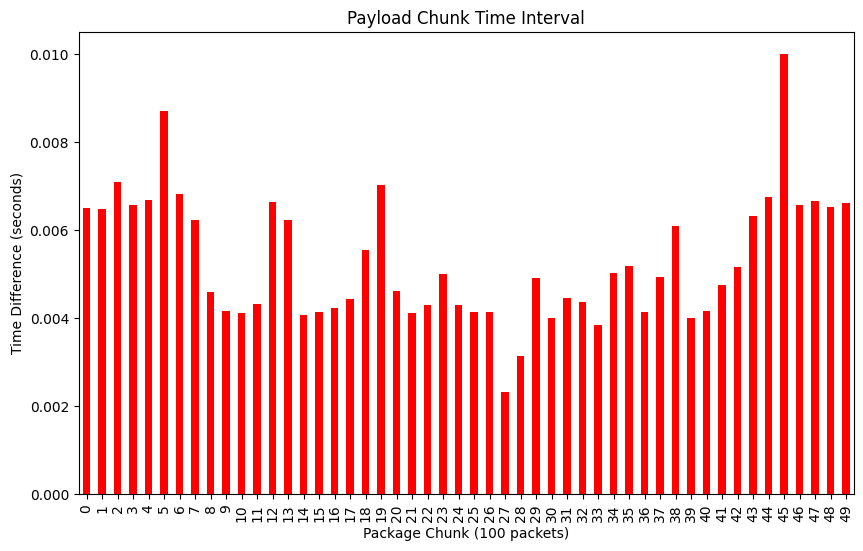

In [10]:

#REAL PROJECT STARTS HERE FOR REPORT
#ABOVE WAS JUST A COLLECTION
payload_data = pd.read_json('Sample 3 - Angle Data.json')
udp_data = []
time_data = []
for packet in payload_data['_source']:
    udp_payload = packet['layers']['udp']['udp.payload']
    time_payload = packet['layers']['frame']['frame.time_relative']
    udp_data.append(udp_payload)
    time_data.append(time_payload)

payload = pd.DataFrame(udp_data,columns=['payload'])
time_data = pd.DataFrame(time_data)
payload['time'] = time_data

payload['time'] = pd.to_datetime(payload['time'].astype(float), unit='s')
payload['time_diff'] = payload['time'].diff().dt.total_seconds()
payload = payload.dropna(subset=['time_diff'])

chunk_size = 100
condensed_data = payload['time_diff'].groupby(payload.index // chunk_size).mean()

plt.figure(figsize=(10, 6))
condensed_data.plot(kind='bar', color='r')
plt.title('Payload Chunk Time Interval')
plt.xlabel(f'Package Chunk ({chunk_size} packets)')
plt.ylabel('Time Difference (seconds)')
plt.grid(False)
plt.show()

198     176
200     178
202     180
205     186
207     190
       ... 
4929    246
4930    248
4931    250
4933    252
4934    254
Name: payload, Length: 2401, dtype: int64
Index([ 389,  888, 1127, 1303, 1495, 1730, 1916, 2086, 2318, 2534, 2823, 3061,
       3285, 3506, 3721, 3893, 4322, 4475, 4630, 4781, 4934],
      dtype='int64')
389       NaN
888     499.0
1127    239.0
1303    176.0
1495    192.0
1730    235.0
1916    186.0
2086    170.0
2318    232.0
2534    216.0
2823    289.0
3061    238.0
3285    224.0
3506    221.0
3721    215.0
3893    172.0
4322    429.0
4475    153.0
4630    155.0
4781    151.0
4934    153.0
dtype: float64


C:\Users\Sergeant Wiley\AppData\Local\Temp\ipykernel_32884\2743305873.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_payload['payload'] = filtered_payload['payload'].str.replace('44:99:a2:b4:46:32:fa:8c:','')


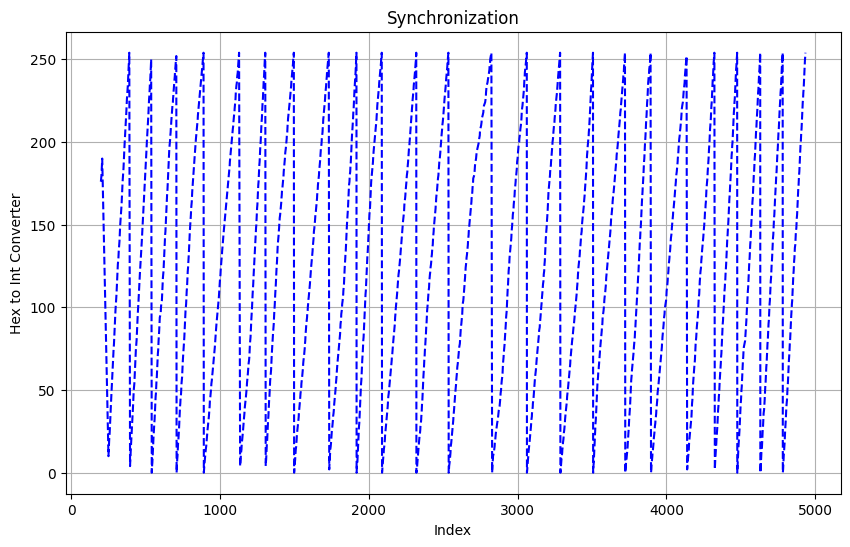

In [28]:
payload_data = pd.read_json('Sample 3 - Angle Data.json')
udp_data = []
time_data = []
for packet in payload_data['_source']:
    udp_payload = packet['layers']['udp']['udp.payload']
    time_payload = packet['layers']['frame']['frame.time_relative']
    udp_data.append(udp_payload)
    time_data.append(time_payload)

payload = pd.DataFrame(udp_data,columns=['payload'])
time_data = pd.DataFrame(time_data)
payload['time'] = time_data

filtered_payload = payload[payload['payload'].str.startswith('44:99:a2:b4:46:32:fa:8c:')]
filtered_payload['payload'] = filtered_payload['payload'].str.replace('44:99:a2:b4:46:32:fa:8c:','')

angle['payload'] = filtered_payload['payload'].str.slice(0,2)
#angle.dropna(inplace=True)
angle['payload'] = angle['payload'].apply(lambda x: int(x, 16))
print(angle['payload'])
angle['time'] = payload['time']

#difference = angle['payload'].max()

difference = angle[angle['payload'] == 254].index
print(difference)
synconization = difference.to_series().diff()
print(synconization)
plt.figure(figsize=(10, 6))
plt.plot(angle.index, angle['payload'], linestyle='--', color='b')
plt.title('Synchronization')
plt.xlabel('Index')
plt.ylabel('Hex to Int Converter')
plt.grid(True)
plt.show()

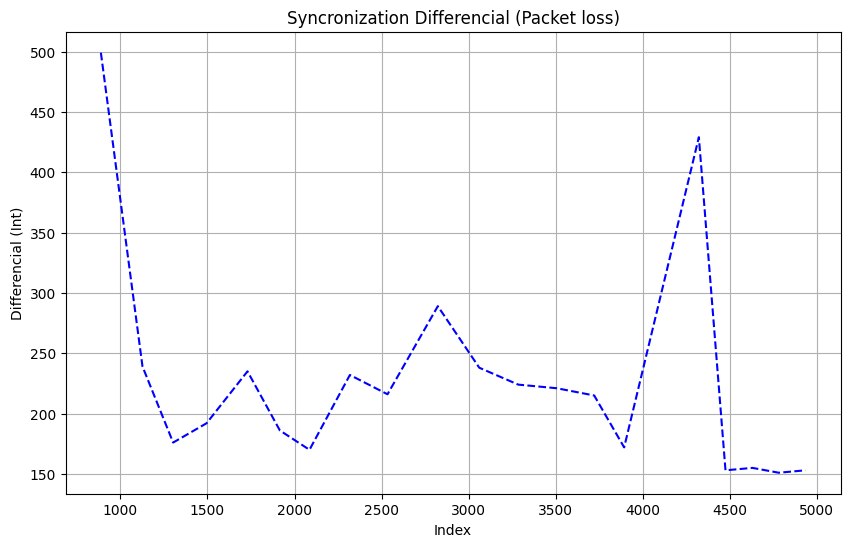

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(synconization.index, synconization, linestyle='--', color='b')
plt.title('Syncronization Differencial (Packet loss)')
plt.xlabel('Index')
plt.ylabel('Differencial (Int)')
plt.grid(True)
plt.show()

C:\Users\Sergeant Wiley\AppData\Local\Temp\ipykernel_30600\1802871776.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_payload['payload'] = filtered_payload['payload'].str.replace('44:99:a2:b4:46:32:fa:8c:','')


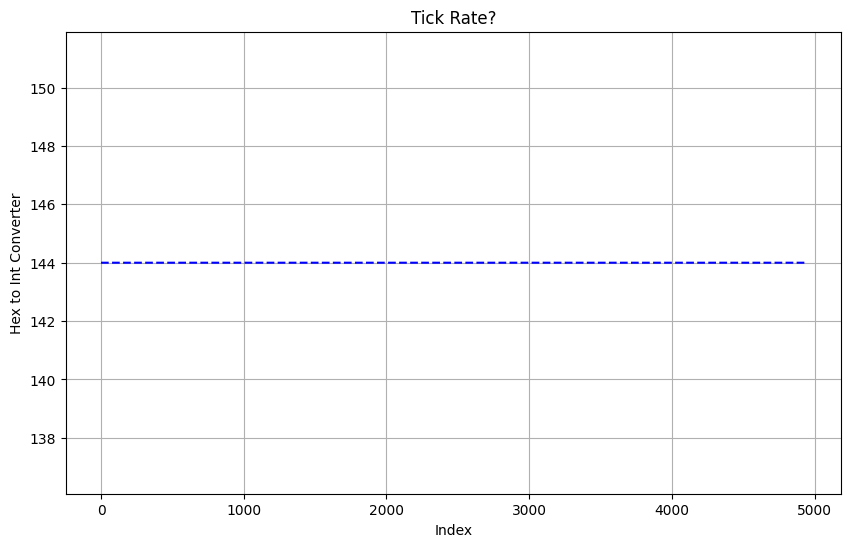

In [ ]:
payload_data = pd.read_json('Sample 3 - Angle Data.json')
udp_data = []
time_data = []
for packet in payload_data['_source']:
    udp_payload = packet['layers']['udp']['udp.payload']
    time_payload = packet['layers']['frame']['frame.time_relative']
    udp_data.append(udp_payload)
    time_data.append(time_payload)

payload = pd.DataFrame(udp_data,columns=['payload'])
time_data = pd.DataFrame(time_data)
payload['time'] = time_data

filtered_payload = payload[payload['payload'].str.startswith('44:99:a2:b4:46:32:fa:8c:')]
filtered_payload['payload'] = filtered_payload['payload'].str.replace('44:99:a2:b4:46:32:fa:8c:','')

angle['payload'] = filtered_payload['payload'].str.slice(6,8)
angle['payload'] = angle['payload'].apply(lambda x: int(x, 16))
angle['time'] = payload['time']

plt.figure(figsize=(10, 6))
plt.plot(angle.index, angle['payload'], linestyle='--', color='b')
plt.title('Tick Rate?')
plt.xlabel('Index')
plt.ylabel('Hex to Int Converter')
plt.grid(True)
plt.show()